In [45]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [34]:
dl_path = '..\\results\\nppmi\\max_concept\\glove300d_l_0.5_DL_top400000.emb.gz_f_conceptnet56_top50000\\conceptnet56_top50000_t40\\max_concepts_of_base.p'
gs_path = '..\\results\\nppmi\\max_concept\\glove300d_l_0.5_GS_top400000.emb.gz_f_conceptnet56_top50000\\conceptnet56_top50000_t40\\max_concepts_of_base.p'
kmeans_path = '..\\results\\nppmi\\max_concept\\glove300d_l_0.5_kmeans_top400000.emb.gz_f_conceptnet56_top50000\\conceptnet56_top50000_t40\\max_concepts_of_base.p'

In [90]:
dl_a = pickle.load(open(dl_path, 'rb'))
gs_a = pickle.load(open(gs_path, 'rb'))
kmeans_a = pickle.load(open(kmeans_path, 'rb'))

In [93]:
dl_a_val = {str(v) for v in dl_a.values()}
gs_a_val = {str(v) for v in gs_a.values()}
kmeans_a_val = {str(v) for v in kmeans_a.values()}
intersection_dict = dl_a_val.intersection(gs_a_val)
intersection_dict = intersection_dict.intersection(kmeans_a_val)
print('DL: ', len(dl_a_val), '\nGS: ', len(gs_a_val), '\nKmeans: ', len(kmeans_a_val), '\nIntersection: ', len(intersection_dict)-1)

DL:  191 
GS:  187 
Kmeans:  154 
Intersection:  63


In [95]:
concept_counter = 0
for item in intersection_dict:
    concept_counter+=(item.count(',')+1)
print(concept_counter)

119


In [96]:
intersection_dict

{'NONE',
 "['anatomy', 'anatomical_structure']",
 "['appendix:countries_of_world', 'kindergarten', 'country']",
 "['art', 'picture', 'artistic']",
 "['band', 'orchestra', 'alternative_rock']",
 "['baseball', 'pitcher']",
 "['biology', 'organism']",
 "['body_part', 'solid_object']",
 "['book', 'books']",
 "['botany', 'plant_part']",
 "['car', 'cars']",
 "['change']",
 "['chemical_compound', 'organic_compound']",
 "['china', 'prefecture']",
 "['comics_character']",
 "['company', 'subsidiary']",
 "['computing']",
 "['country', 'appendix:countries_of_world']",
 "['county_seat', 'usa']",
 "['cricket', 'batsman']",
 "['dance', 'dancing']",
 "['disease', 'pathology']",
 "['drug', 'pharmaceutical_drug']",
 "['emotion', 'feeling']",
 "['england', 'kent']",
 "['ethnic_group', 'english_language']",
 "['film']",
 "['fish', 'freshwater']",
 "['fruit', 'edible_fruit']",
 "['geology', 'geologic']",
 "['germany', 'german', 'town']",
 "['given_name', 'diminutive']",
 "['good']",
 "['grammar', 'noun', '

In [86]:
def average_concept_per_base(assignments):
    a_set = {}
    a_counter = []
    for k, v in assignments.items():
        if v != 'NONE':
            a_set[k]=set(v)
            a_counter.append(float(len(v)))
        else:
            a_set[k]={}
            
    return np.mean(a_counter), np.var(a_counter)

In [87]:
average_concept_per_base(dl_a)

(2.5498783454987834, 2.571113123886314)

In [88]:
average_concept_per_base(gs_a)

(2.5621562156215623, 2.3847504662457446)

In [89]:
average_concept_per_base(kmeans_a)

(2.387543252595156, 1.8636510578177943)

In [33]:
gs_a

{0: ['like', 'sometimes', 'type', 'has', 'big', 'general_term'],
 1: ['think', 'thinking'],
 2: ['anatomy', 'anatomical_structure'],
 3: ['person_with_nationality', 'african', 'asian', 'european'],
 4: ['bright', 'shiny', 'brilliant'],
 5: ['given_name', 'diminutive'],
 6: ['county_seat', 'usa'],
 7: ['bad', 'terrible'],
 8: ['news', 'newspaper'],
 9: ['india', 'metropolis'],
 10: ['city', 'metropolis', 'prefecture'],
 11: ['france', 'switzerland', 'belgium'],
 12: ['military', 'army', 'soldier'],
 13: ['boat', 'ferry', 'ship', 'oar'],
 14: ['road', 'street', 'highway'],
 15: ['criminal', 'crime'],
 16: ['sound', 'noise'],
 17: ['slang'],
 18: ['china', 'prefecture'],
 19: ['historical'],
 20: ['physics'],
 21: ['uk', 'dialect'],
 22: ['crop', 'harvest'],
 23: ['music', 'chord', 'music_genre', 'musical', 'melody'],
 24: ['law', 'legal'],
 25: ['cooking', 'cook'],
 26: ['person'],
 27: ['drug', 'pharmaceutical_drug'],
 28: ['disease', 'pathology'],
 29: ['ethnic_group', 'english_languag

In [63]:
def hist_on_avg_concepts(assignments):
    a_set = {}
    for k, v in assignments.items():
        if v != 'NONE':
            a_set[k]=len(v)
        else:
            a_set[k]=0
    plt.hist(a_set.values())
    plt.show()

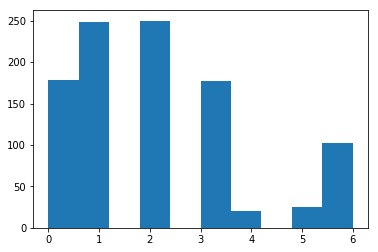

In [64]:
hist_on_avg_concepts(dl_a)

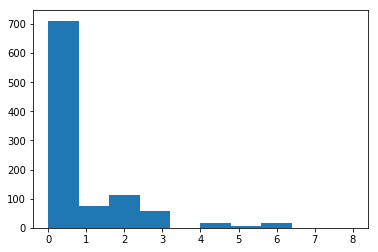

In [65]:
hist_on_avg_concepts(kmeans_a)

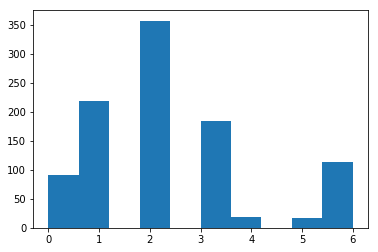

In [66]:
hist_on_avg_concepts(gs_a)